In [1]:
import sys
import torch
import ot

import numpy as np
import matplotlib.pyplot as plt

sys.path.append("../lib")
from distributions import sampleWrappedNormal
from utils_hyperbolic import *
from hsw import hyper_sliced_wasserstein
from hhsw import horo_hyper_sliced_wasserstein_lorentz, horo_hyper_sliced_wasserstein_poincare
from sw import sliced_wasserstein
from utility import *

device = "cuda" if torch.cuda.is_available() else "cpu"

## Lorentz Model

When order $p=2$ and $\mathbb{L}^d\subset \mathbb{R}^{d+1}$, SFW distance has upper bound sample convergence rate $O(n^{-\frac{1}{(d+1)\log_2(9)}})$ for morton curve with Lorentz model and SFW distance has upper bound sample convergence rate $O(n^{-\frac{1}{d\log_2(9)}})$ for morton curve with Poincare ball.

Hence, for log-log plot, Lorentz model has smallest slope $s_1=-\frac{1}{(d+1)\log_2(9)}$ and Poincare ball has smallest slope $s_2=-\frac{1}{d\log_2(9)}$.

Hence, as $d$ increases, $\frac{s_1}{s_2}$ will increase(tends to 1).  


### low dimension

In [2]:
mu0 = torch.tensor([1,0,0,0], dtype=torch.float64, device=device)
Sigma0 = torch.eye(3, dtype=torch.float, device=device)


n_try = 10
N = [100,1000,10000,100000]

In [3]:
L_sfw_poincare_sort = np.zeros((len(N), n_try))
L_sfw_lorentz_sort = np.zeros((len(N), n_try))
i = 0

torch.manual_seed(42)

for n in N:
    for k in range(n_try):
        x0 = sampleWrappedNormal(mu0, Sigma0, n)
        x1 = sampleWrappedNormal(mu0, Sigma0, n)

        distance = SFW(x0,x1,hyperbolic_model="Lorentz",spf_curve="Mm_l")
        L_sfw_lorentz_sort[i,k] = distance.item()**2

        distance = SFW(x0,x1,hyperbolic_model="Lorentz",spf_curve="Mm_p")
        # distance = SFW(lorentz_to_poincare(x0),lorentz_to_poincare(x1),hyperbolic_model="Poincare",spf_curve="Mm_p")
        
        L_sfw_poincare_sort[i,k] = distance.item()**2

    i += 1
    print(i)

1
2
3
4


In [4]:
L_sfw_lorentz_m = np.mean(L_sfw_lorentz_sort,1)
L_sfw_poincare_m = np.mean(L_sfw_poincare_sort,1)

### high dimension

In [5]:
d = 50
mu0 = torch.tensor(np.zeros(d), dtype=torch.float64, device=device)
mu0[0] = 1
Sigma0 = torch.eye(d-1, dtype=torch.float, device=device)


n_try = 10
N = [100,1000,10000,100000]

In [6]:
L_sfw_poincare_sort = np.zeros((len(N), n_try))
L_sfw_lorentz_sort = np.zeros((len(N), n_try))
i = 0

torch.manual_seed(42)


for n in N:
    for k in range(n_try):
        x0 = sampleWrappedNormal(mu0, Sigma0, n)
        x1 = sampleWrappedNormal(mu0, Sigma0, n)

        distance = SFW(x0,x1,hyperbolic_model="Lorentz",spf_curve="Mm_l")
        L_sfw_lorentz_sort[i,k] = distance.item()**2

        distance = SFW(x0,x1,hyperbolic_model="Lorentz",spf_curve="Mm_p")
        # distance = SFW(lorentz_to_poincare(x0),lorentz_to_poincare(x1),hyperbolic_model="Poincare",spf_curve="Mm_p")
        L_sfw_poincare_sort[i,k] = distance.item()**2

    i += 1
    print(i)

1
2
3
4


Below, we find Lorentz model has smaller convergence rate than Poincare ball.

Below, we find Lorentz model's convergence rate will get closer to Poincare ball's as $d$ increases.

0.8894624311999239
0.9873257451215758


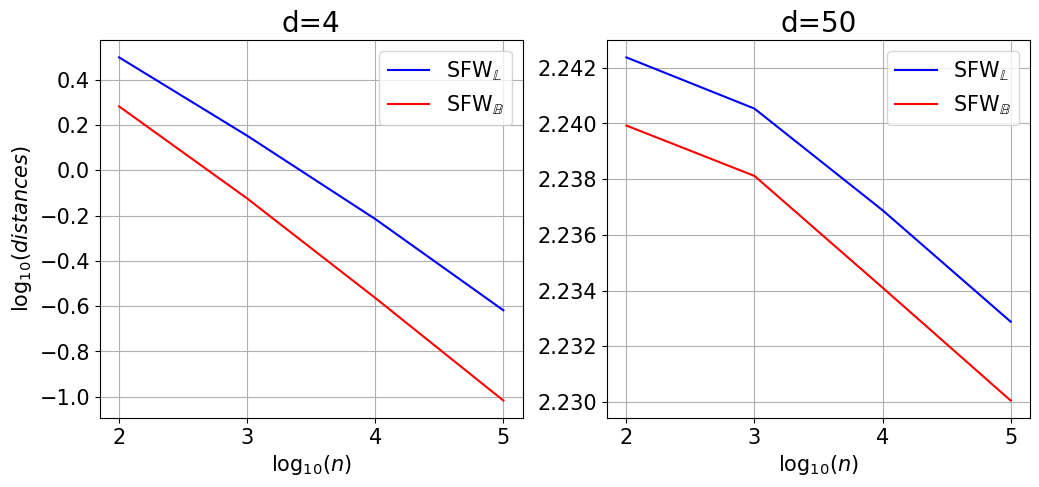

In [9]:
plt.figure(dpi=100, figsize=(12,5))

plt.subplot(1,2,1)



plt.plot(np.log10(np.array(N)),np.log10(L_sfw_lorentz_m),c="b",label=r"SFW$_\mathbb{L}$")
plt.plot(np.log10(np.array(N)),np.log10(L_sfw_poincare_m),c="r",label=r"SFW$_\mathbb{B}$")
plt.legend(fontsize=15)
plt.xlabel(r"$\log_{10}(n)$", fontsize=15)
plt.ylabel(r"$\log_{10}(distances)$", fontsize=15)

plt.xticks([2,3,4,5],fontsize=15)
plt.yticks(fontsize=15)


plt.grid(True)
plt.title("d=4",fontsize=20)

diff1 = np.log10(L_sfw_lorentz_m[-2])-np.log10(L_sfw_lorentz_m[-1])
diff2 = np.log10(L_sfw_poincare_m[-2])-np.log10(L_sfw_poincare_m[-1])

print(diff1/diff2)


plt.subplot(1,2,2)
L_sfw_lorentz_mh = np.mean(L_sfw_lorentz_sort,1)
L_sfw_poincare_mh = np.mean(L_sfw_poincare_sort,1)


plt.plot(np.log10(np.array(N)),np.log10(L_sfw_lorentz_mh),c="b",label=r"SFW$_\mathbb{L}$")
plt.plot(np.log10(np.array(N)),np.log10(L_sfw_poincare_mh),c="r",label=r"SFW$_\mathbb{B}$")
plt.legend(fontsize=15)
plt.xlabel(r"$\log_{10}(n)$", fontsize=15)
# plt.ylabel(r"$\log_{10}(distances)$", fontsize=15)

plt.xticks([2,3,4,5],fontsize=15)
plt.yticks(fontsize=15)


plt.grid(True)
plt.title("d=50",fontsize=20)

diff1 = np.log10(L_sfw_lorentz_mh[-2])-np.log10(L_sfw_lorentz_mh[-1])
diff2 = np.log10(L_sfw_poincare_mh[-2])-np.log10(L_sfw_poincare_mh[-1])

print(diff1/diff2)

plt.savefig("./hmodel.pdf", format="pdf", bbox_inches="tight")